# Data Processing And Exploratory Data Analysis

## Importing Libraries

In [19]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs 
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

## Loading Datasets

In [6]:
anime_data = pd.read_csv(r"C:\Users\ASUS\Documents\GitHub\Anime_Recommendations_System\Dataset\anime.csv")

anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [7]:
rating1 = pd.read_csv(r"C:\Users\ASUS\Documents\GitHub\Anime_Recommendations_System\Dataset\rating1.csv")

rating1

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
3906863,36791,2795,7
3906864,36791,2904,10
3906865,36791,3270,10
3906866,36791,3299,8


In [8]:
rating2 = pd.read_csv(r"C:\Users\ASUS\Documents\GitHub\Anime_Recommendations_System\Dataset\rating2.csv")

rating2

,user_id,anime_id,rating
0,36791,3467,7
1,36791,3503,8
2,36791,3549,9
3,36791,3653,8
4,36791,3654,7
...,...,...,...
3906864,73515,16512,7
3906865,73515,17187,9
3906866,73515,22145,10
3906867,73516,790,9


In [9]:
rating_data = pd.concat([rating1, rating2],axis=0)
rating_data.reset_index(inplace=True)
rating_data.drop(columns='index', inplace=True)

rating_data

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


## Finding Unique Values In Dataset

In [10]:
def analysis(df):
    num_col = df.select_dtypes(include=np.number).columns.tolist()
    cata_col = df.select_dtypes(include=['object']).columns.tolist()

    print("-- Analyzing Numerical Column : --\n")
    for i in num_col:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[i] > upper])) +
                        (len(df[df[i] < lower])))/len(df[i]))*100
        
        m = df[i].isna().sum()
        total = int(df[i].shape[0])
        
        print("Analyzing " + i + " Column :")
        print('type     :   '+str(df[i].dtype))
        print('mean     :   '+str(round(df[i].mean(),2)))
        print('median   :   '+str(round(df[i].median(),2)))
        print('std      :   '+str(round(df[i].std(),2)))
        print('unique   :   '+str(len(df[i].unique())))
        print('min      :   '+str(df[i].min()))
        print('max      :   '+str(df[i].max()))
        print('25%      :   '+str(round(df[i].quantile(0.25),2)))
        print('75%      :   '+str(round(df[i].quantile(0.75),2)))
        print('missing  :   '+str(m) + '(' +str(round((m/total)*100,2)) +'%)' )
        print('Outlier  :   '+str(round(percentage, 2)) +'%')
        print(df[i].unique())

        print('\n')

    print('\n'+'\n')

    print("-- Analyzing Categorical Column -- \n")
    for j in cata_col:

        m = df[j].isna().sum()
        total = int(df[j].shape[0])

        print("Analyzing " + str(j) + " Column :")
        print('Type     :   '+str(df[j].dtype))
        print('unique   :   '+str(len(df[j].unique())))
        print('missing  :   '+str(m) + '(' +str(round((m/total)*100,2)) +'%)' )
        print(df[j].unique())

        print('\n')

In [11]:
analysis(anime_data)

-- Analyzing Numerical Column : --

Analyzing anime_id Column :
type     :   int64
mean     :   14058.22
median   :   10260.5
std      :   11455.29
unique   :   12294
min      :   1
max      :   34527
25%      :   3484.25
75%      :   24794.5
missing  :   0(0.0%)
Outlier  :   0.0%
[32281  5114 28977 ...  5621  6133 26081]


Analyzing rating Column :
type     :   float64
mean     :   6.47
median   :   6.57
std      :   1.03
unique   :   599
min      :   1.67
max      :   10.0
25%      :   5.88
75%      :   7.18
missing  :   230(1.87%)
Outlier  :   1.86%
[ 9.37  9.26  9.25  9.17  9.16  9.15  9.13  9.11  9.1   9.06  9.05  9.04
  8.98  8.93  8.92  8.88  8.84  8.83  8.82  8.81  8.8   8.78  8.77  8.76
  8.75  8.74  8.73  8.72  8.71  8.69  8.68  8.67  8.66  8.65  8.64  8.62
  8.61  8.6   8.59  8.58  8.57  8.56  8.55  8.54  8.53  8.52  8.51  8.5
  8.49  8.48  8.47  8.46  8.45  8.44  8.43  8.42  8.41  8.4   8.39  8.38
  8.37  8.36  8.35  8.34  8.33  8.32  8.31  8.3   8.29  8.28  8.27  8.26
  8.

In [12]:
analysis(rating_data)

-- Analyzing Numerical Column : --

Analyzing user_id Column :
type     :   int64
mean     :   36727.96
median   :   36791.0
std      :   20997.95
unique   :   73515
min      :   1
max      :   73516
25%      :   18974.0
75%      :   54757.0
missing  :   0(0.0%)
Outlier  :   0.0%
[    1     2     3 ... 73514 73515 73516]


Analyzing anime_id Column :
type     :   int64
mean     :   8909.07
median   :   6213.0
std      :   8883.95
unique   :   11200
min      :   1
max      :   34519
25%      :   1240.0
75%      :   14093.0
missing  :   0(0.0%)
Outlier  :   0.07%
[   20    24    79 ... 29481 34412 30738]


Analyzing rating Column :
type     :   int64
mean     :   6.14
median   :   7.0
std      :   3.73
unique   :   11
min      :   -1
max      :   10
25%      :   6.0
75%      :   9.0
missing  :   0(0.0%)
Outlier  :   19.11%
[-1 10  8  6  9  7  3  5  4  1  2]





-- Analyzing Categorical Column -- 



## 

In [ ]:
g = anime_data['genre'].str.split(',', expand=True)

g.rename(columns={  0: 'g0', 1: 'g1', 2:'g2', 3: 'g3', 4: 'g4', 5: 'g5',
                    6: 'g6', 7: 'g7', 8: 'g8', 9: 'g9', 10: 'g10',
                    11:'g11', 12:'g12'}, inplace=True)

g

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12
0,Drama,Romance,School,Supernatural,None,None,None,None,None,None,None,None,None
1,Action,Adventure,Drama,Fantasy,Magic,Military,Shounen,None,None,None,None,None,None
2,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
3,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
4,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12290,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12291,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12292,Hentai,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
analysis(g)

-- Analyzing Numerical Column : --




-- Analyzing Categorical Column -- 

Analyzing g0 Column :
Type     :   object
unique   :   41
missing  :   62(0.5%)
['Drama' 'Action' 'Sci-Fi' 'Comedy' 'Adventure' 'Fantasy' 'Mystery'
 'Psychological' 'Ecchi' 'Josei' 'Military' 'Romance' 'Demons' 'Dementia'
 'Music' 'Game' 'Cars' 'Mecha' 'Horror' 'School' 'Historical' 'Kids'
 'Shounen' 'Shoujo' 'Magic' 'Harem' 'Martial Arts' 'Sports'
 'Slice of Life' 'Seinen' nan 'Parody' 'Police' 'Thriller' 'Supernatural'
 'Samurai' 'Super Power' 'Vampire' 'Space' 'Hentai' 'Yaoi']


Analyzing g1 Column :
Type     :   object
unique   :   44
missing  :   2866(23.31%)
[' Romance' ' Adventure' ' Comedy' ' Thriller' ' Drama' ' Military'
 ' Fantasy' ' School' ' Music' ' Slice of Life' ' Mecha' ' Mystery'
 ' Horror' ' Police' ' Parody' ' Seinen' ' Psychological' ' Sci-Fi'
 ' Demons' ' Historical' ' Sports' ' Supernatural' ' Game' ' Magic'
 ' Josei' ' Shounen' ' Harem' ' Cars' ' Dementia' None ' Shoujo' ' Kids'
 ' Samur

In [ ]:
gen =[]

for i in g['g0'].unique():
    gen.append(i)

gen

['Drama',
 'Action',
 'Sci-Fi',
 'Comedy',
 'Adventure',
 'Fantasy',
 'Mystery',
 'Psychological',
 'Ecchi',
 'Josei',
 'Military',
 'Romance',
 'Demons',
 'Dementia',
 'Music',
 'Game',
 'Cars',
 'Mecha',
 'Horror',
 'School',
 'Historical',
 'Kids',
 'Shounen',
 'Shoujo',
 'Magic',
 'Harem',
 'Martial Arts',
 'Sports',
 'Slice of Life',
 'Seinen',
 nan,
 'Parody',
 'Police',
 'Thriller',
 'Supernatural',
 'Samurai',
 'Super Power',
 'Vampire',
 'Space',
 'Hentai',
 'Yaoi']

In [ ]:
gen.append('Romance')

In [ ]:
gen2 = []

for i in g['g2'].unique():
    for j in gen:
        if not i in j:
            print(i,j)


 School Drama
 School Action
 School Sci-Fi
 School Comedy
 School Adventure
 School Fantasy
 School Mystery
 School Psychological
 School Ecchi
 School Josei
 School Military
 School Romance
 School Demons
 School Dementia
 School Music
 School Game
 School Cars
 School Mecha
 School Horror
 School School
 School Historical
 School Kids
 School Shounen
 School Shoujo
 School Magic
 School Harem
 School Martial Arts
 School Sports
 School Slice of Life
 School Seinen


TypeError: argument of type 'float' is not iterable

In [ ]:
le = LabelEncoder()

In [ ]:
genre = g[['g0']]

genre

,g0
0,Drama
1,Action
2,Action
3,Sci-Fi
4,Action
...,...
12289,Hentai
12290,Hentai
12291,Hentai
12292,Hentai


In [ ]:
genre['t0'] = le.fit_transform(g['g0'])
genre['t1'] = le.fit_transform(g['g1'])
genre['t2'] = le.transform(g['g2'])
genre['t3'] = le.transform(g['g3'])
genre['t4'] = le.transform(g['g4'])

In [ ]:
genre

,g0,t0,t1,t2,t3,t4
0,Drama,6,24,26,37,42
1,Action,0,0,5,7,15
2,Action,0,2,11,21,25
3,Sci-Fi,28,38,42,42,42
4,Action,0,2,11,21,25
...,...,...,...,...,...,...
12289,Hentai,11,42,42,42,42
12290,Hentai,11,42,42,42,42
12291,Hentai,11,42,42,42,42
12292,Hentai,11,42,42,42,42


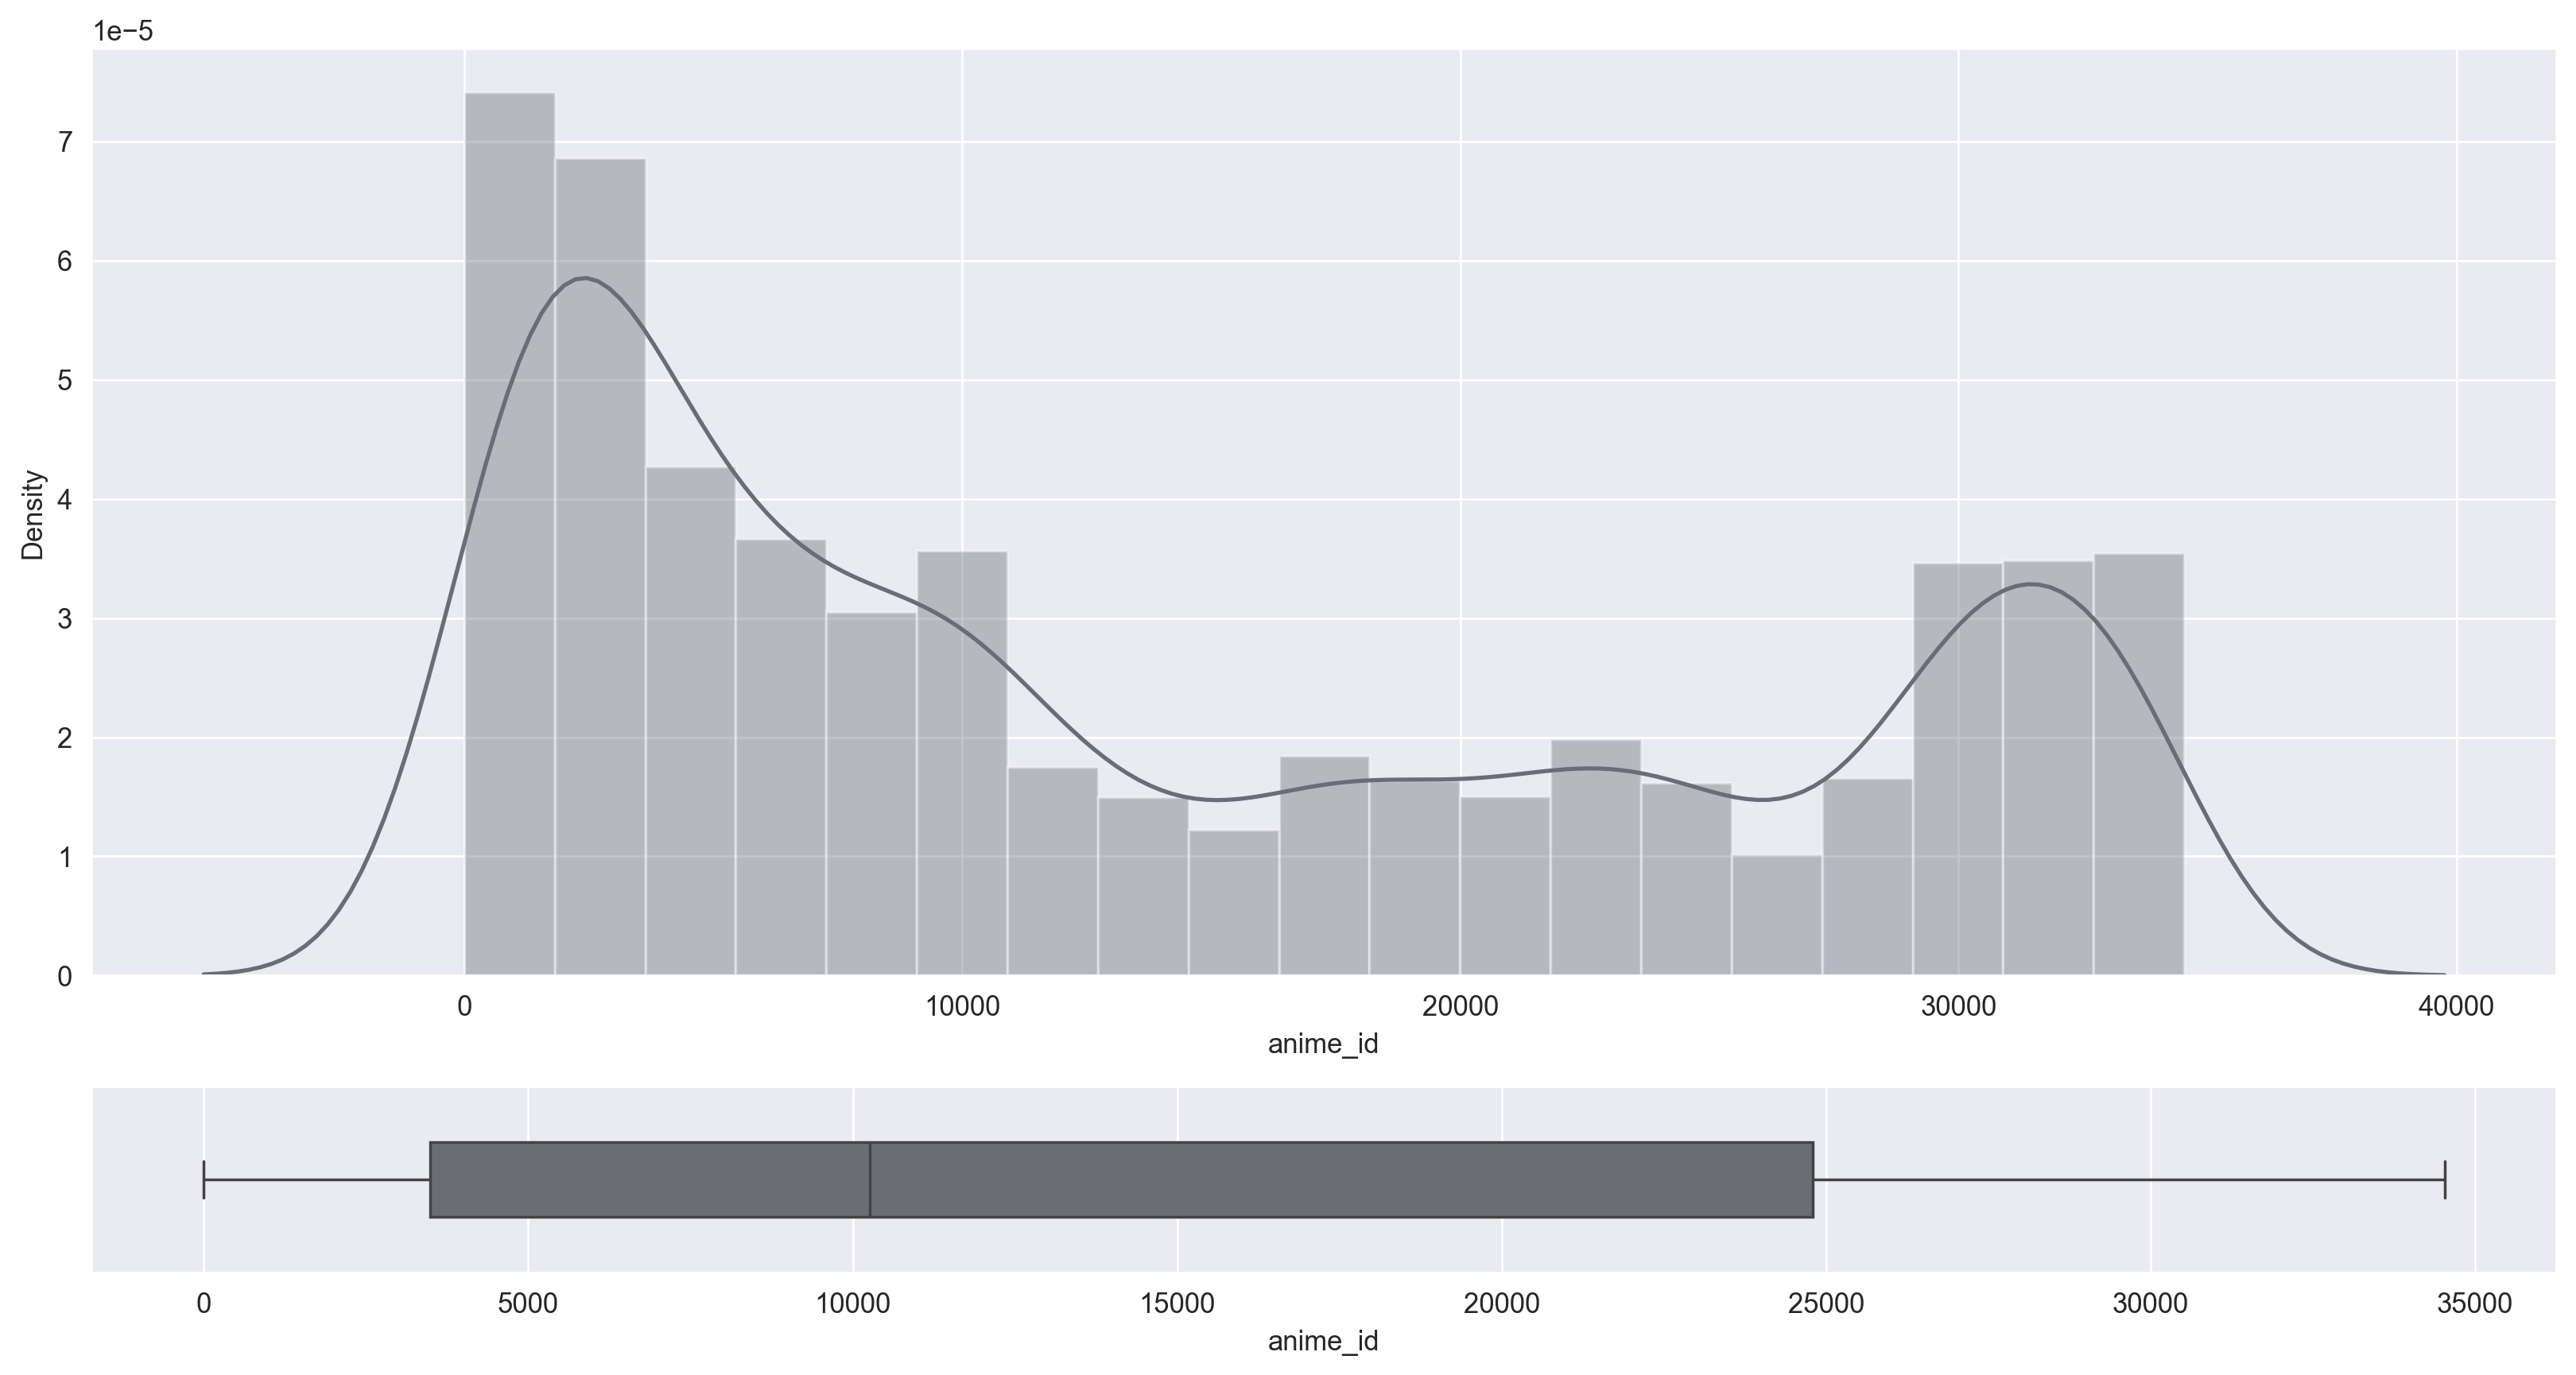

In [ ]:
gridkw = dict(height_ratios=[5, 1])
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw=gridkw)

sns.distplot(anime_data['anime_id'], ax=ax1 , color='#686D76') #array, top subplot
sns.boxplot(x=anime_data['anime_id'], ax=ax2, width=.4, color='#686D76') #bottom subplot

plt.show()

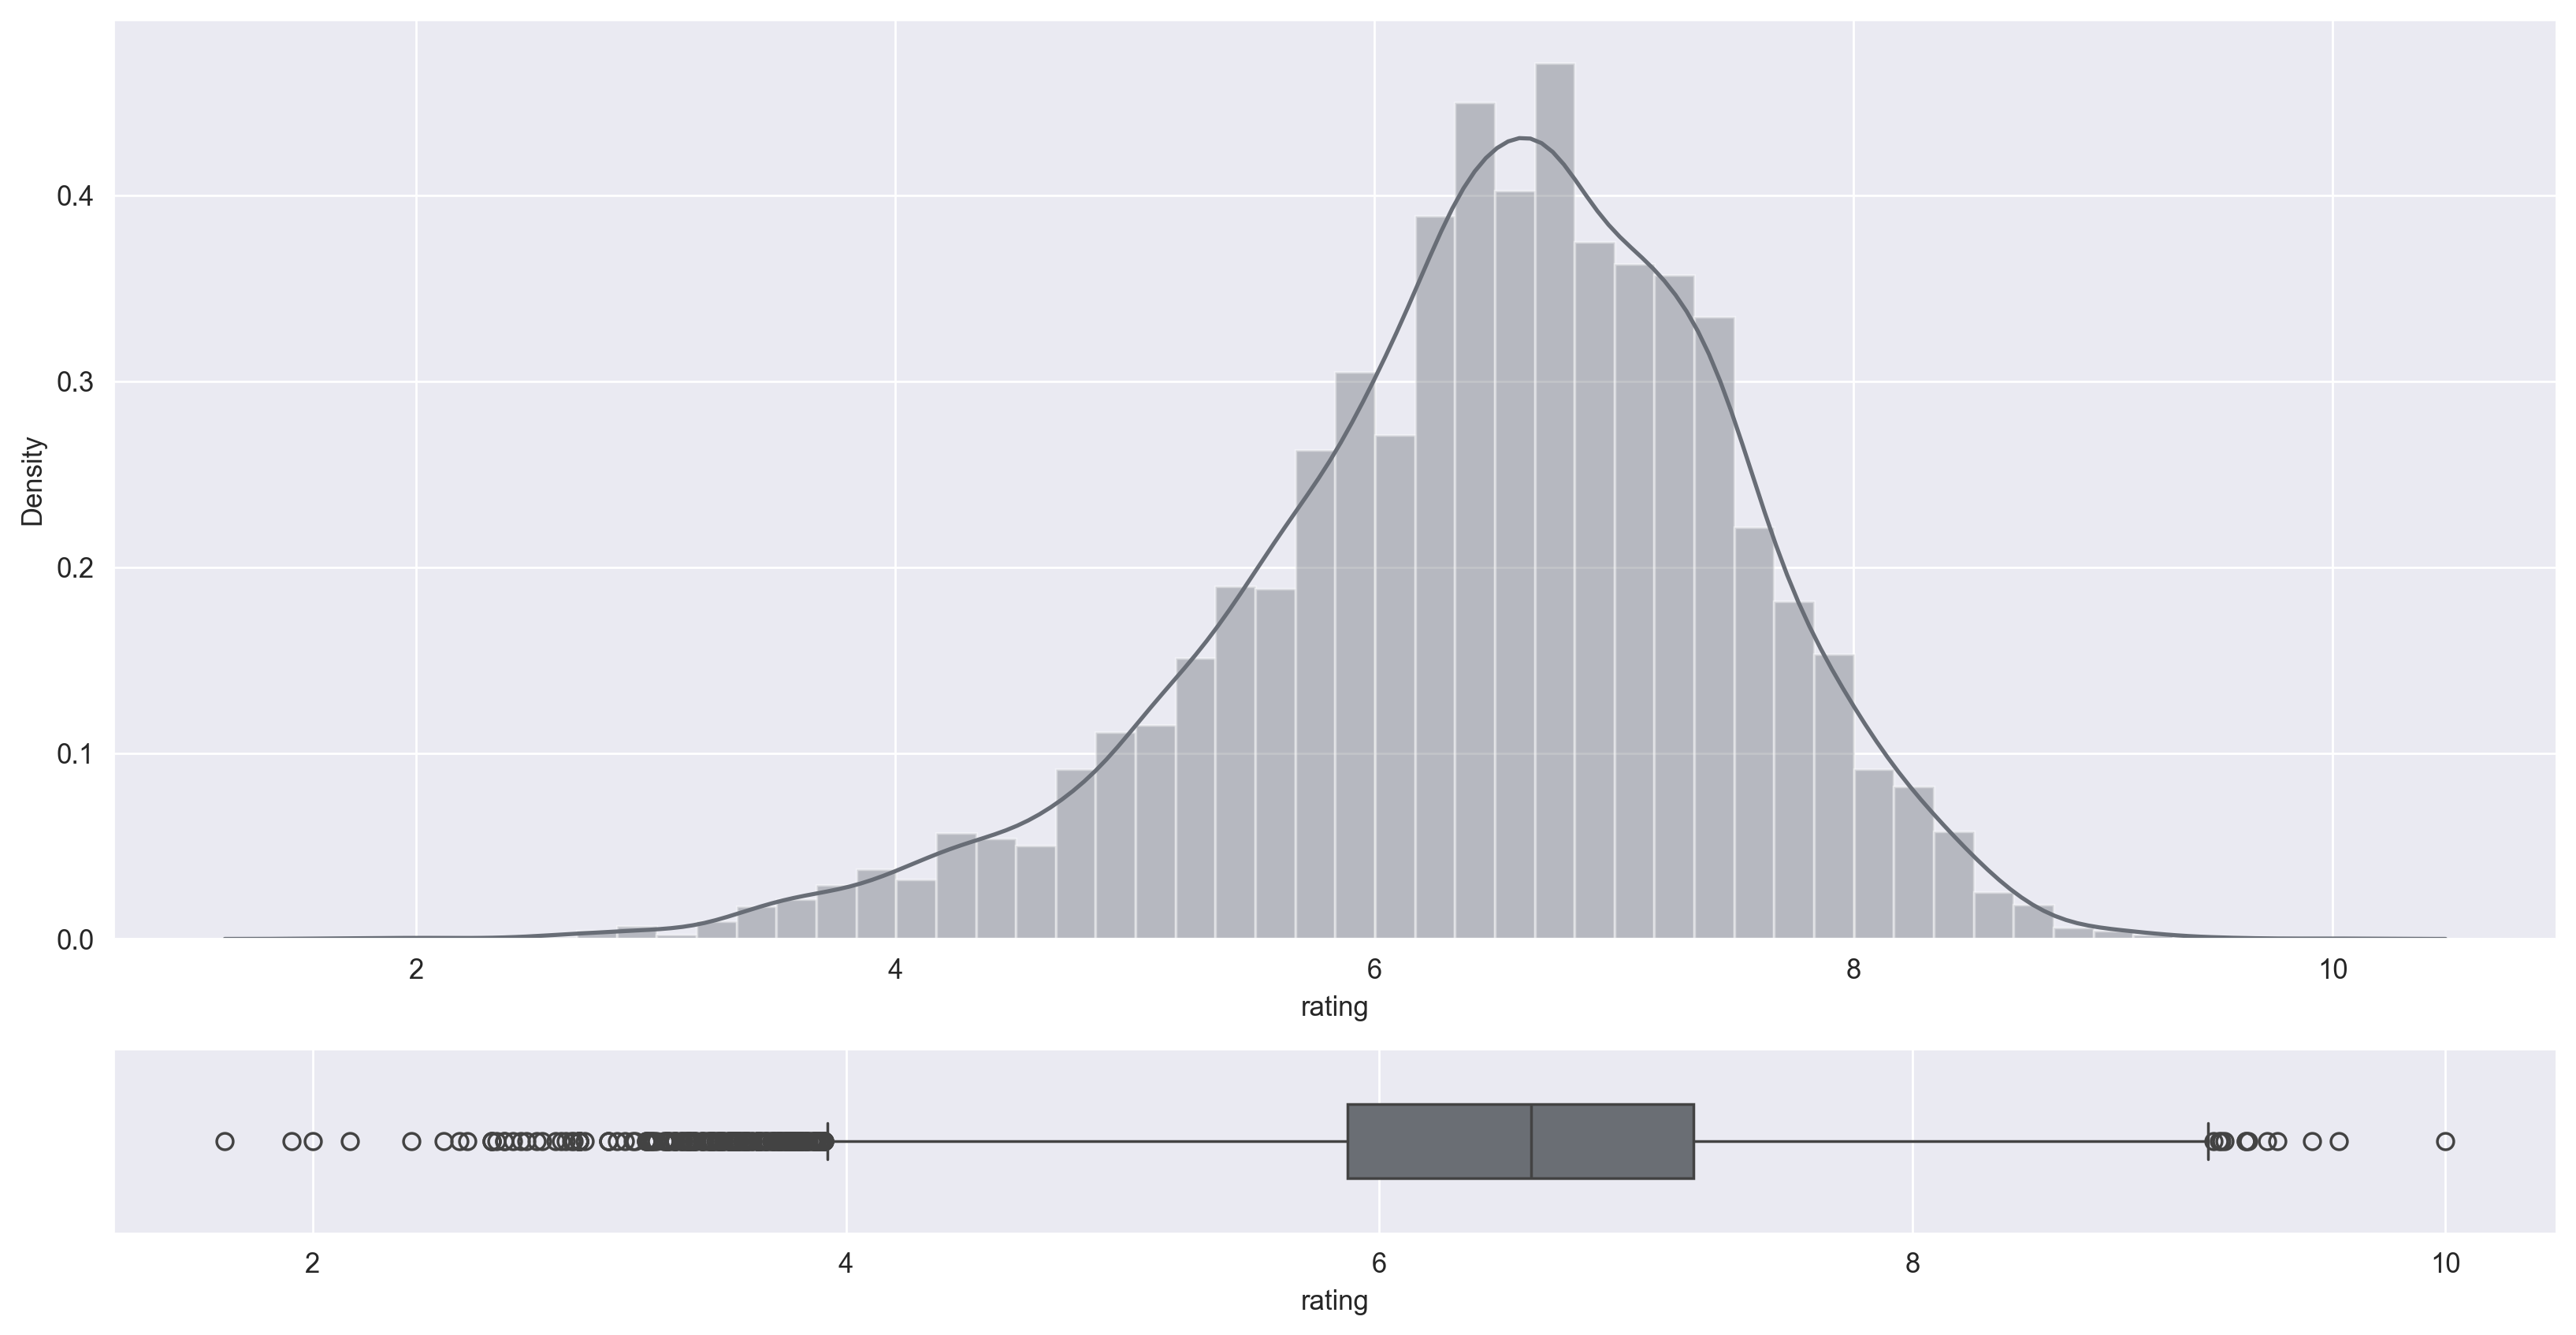

In [ ]:
gridkw = dict(height_ratios=[5, 1])
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw=gridkw)

sns.distplot(anime_data['rating'], ax=ax1 , color='#686D76') #array, top subplot
sns.boxplot(x=anime_data['rating'], ax=ax2, width=.4, color='#686D76') #bottom subplot

plt.show()

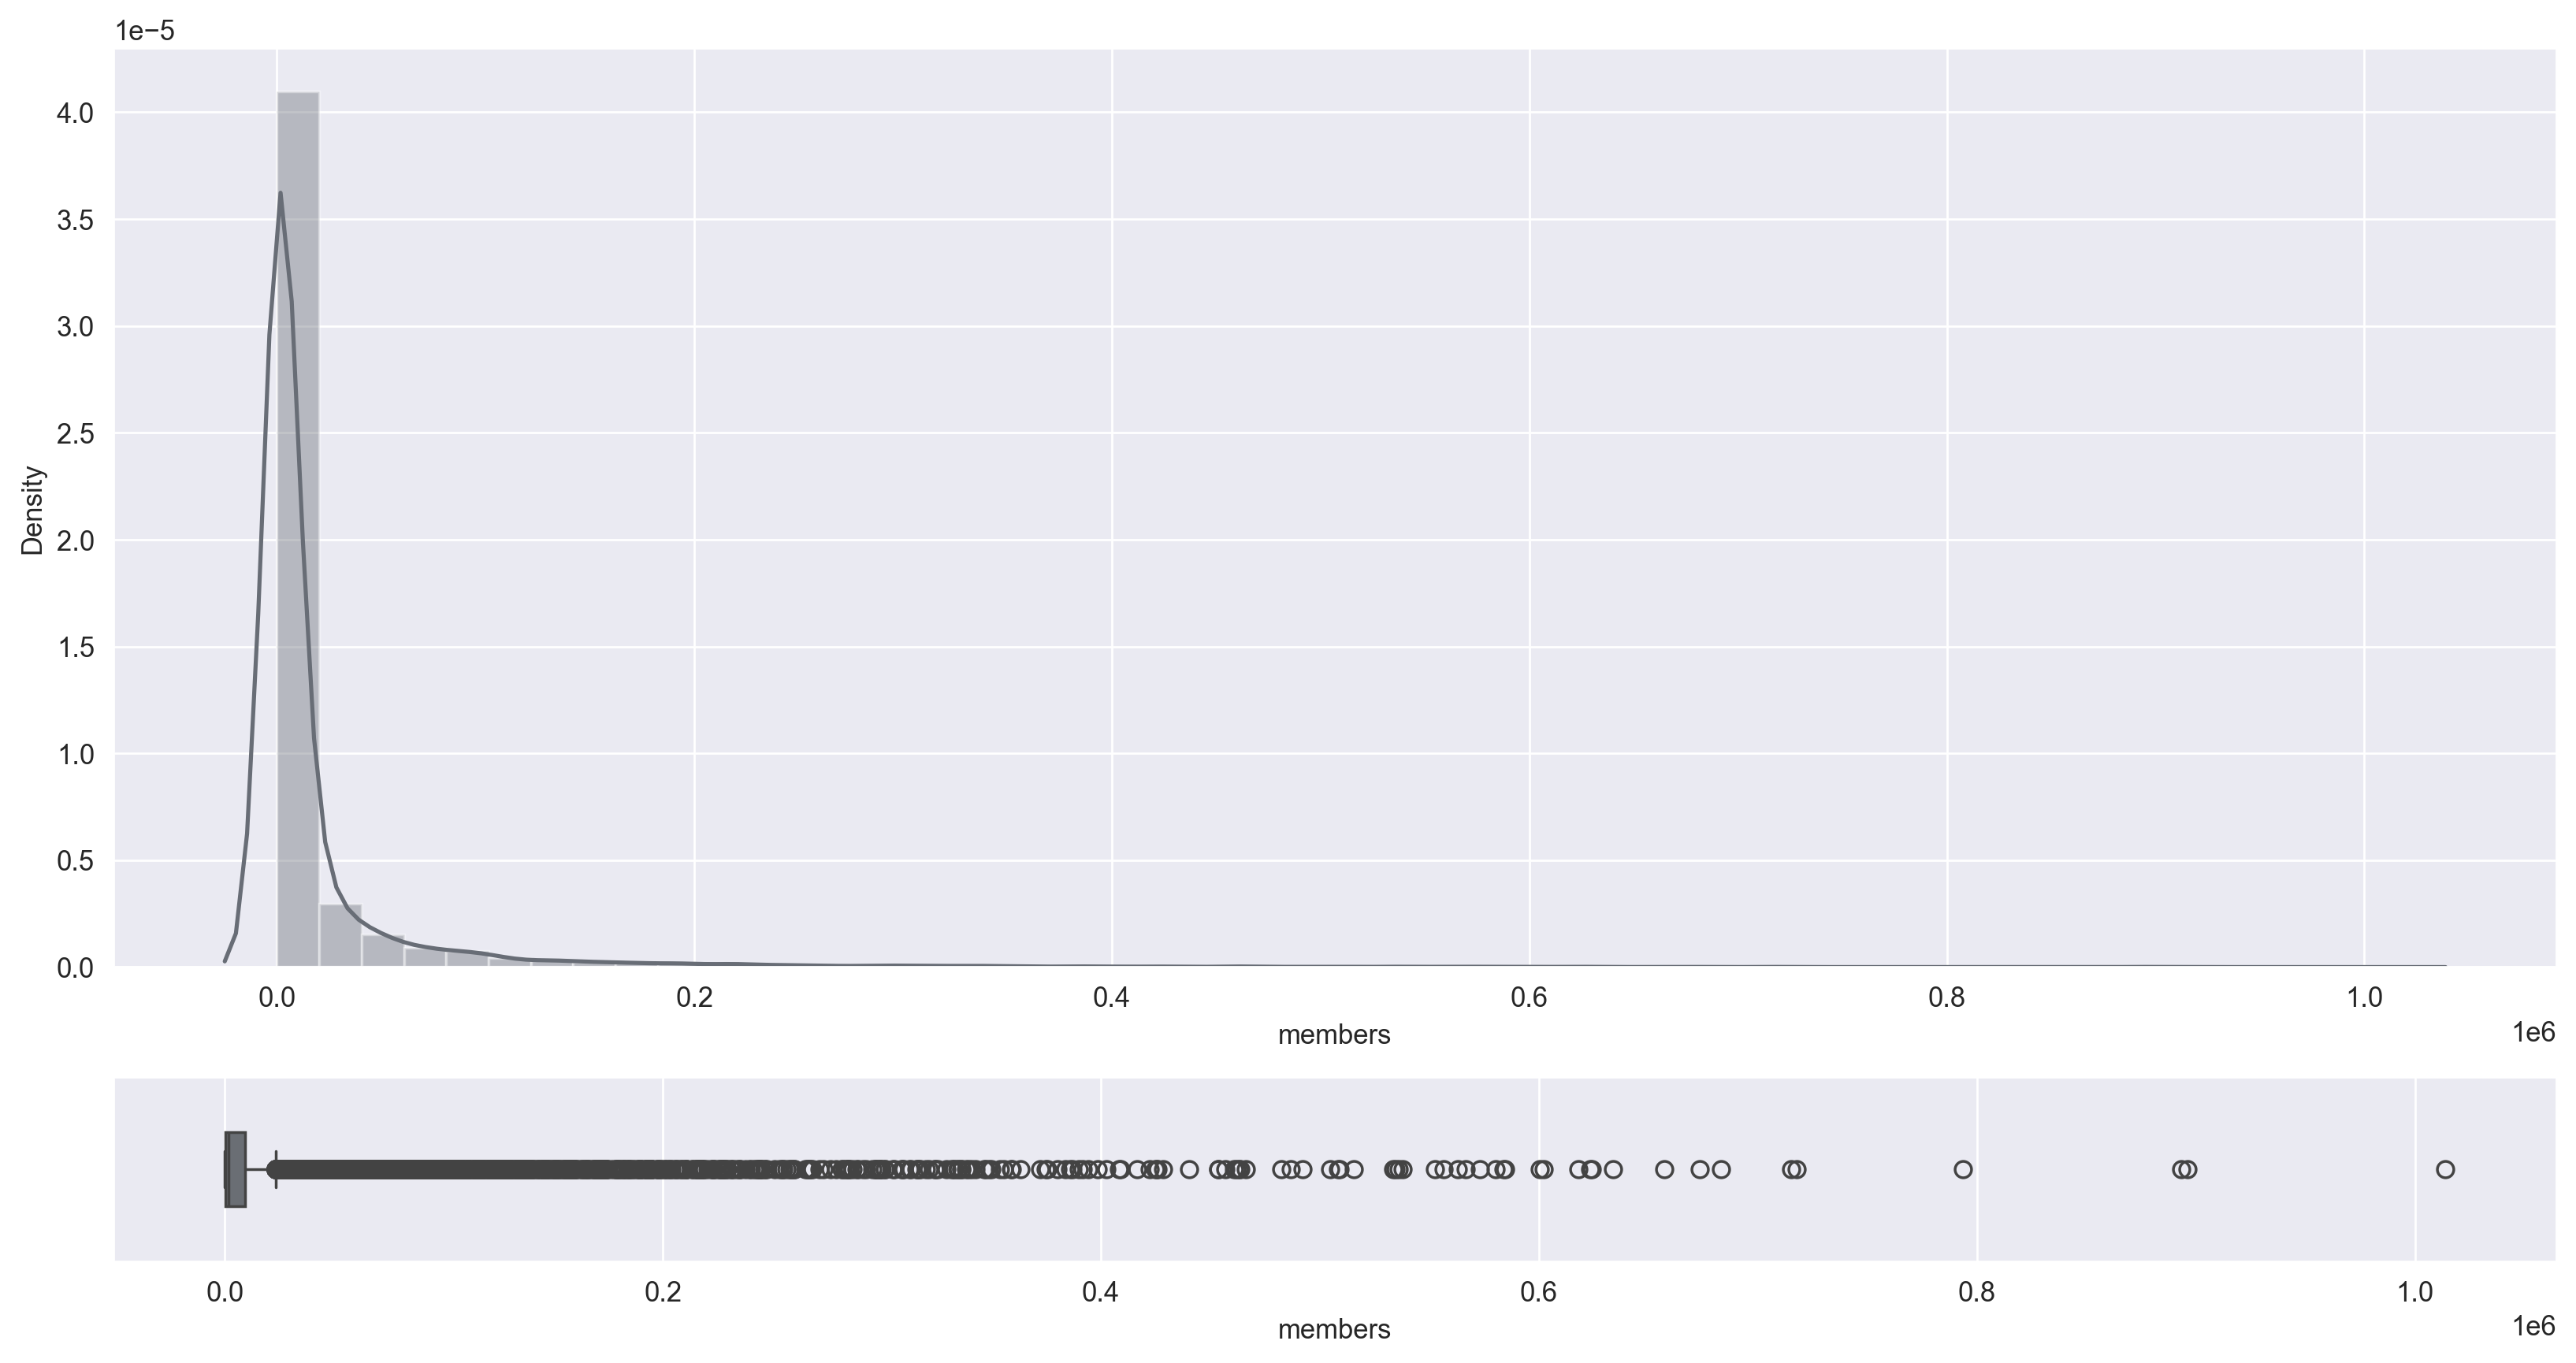

In [ ]:
gridkw = dict(height_ratios=[5, 1])
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw=gridkw)

sns.distplot(anime_data['members'], ax=ax1 , color='#686D76') #array, top subplot
sns.boxplot(x=anime_data['members'], ax=ax2, width=.4, color='#686D76') #bottom subplot

plt.show()

In [ ]:
anime_data['episodes'].value_counts()

episodes
1      5677
2      1076
12      816
13      572
26      514
       ... 
358       1
366       1
201       1
172       1
125       1
Name: count, Length: 187, dtype: int64

In [ ]:
anime_data.loc[anime_data['episodes'] == 'Unknown', 'episodes'] = 1
anime_data['episodes'] = anime_data['episodes'].apply(pd.to_numeric)

anime_data['episodes'].dtype
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


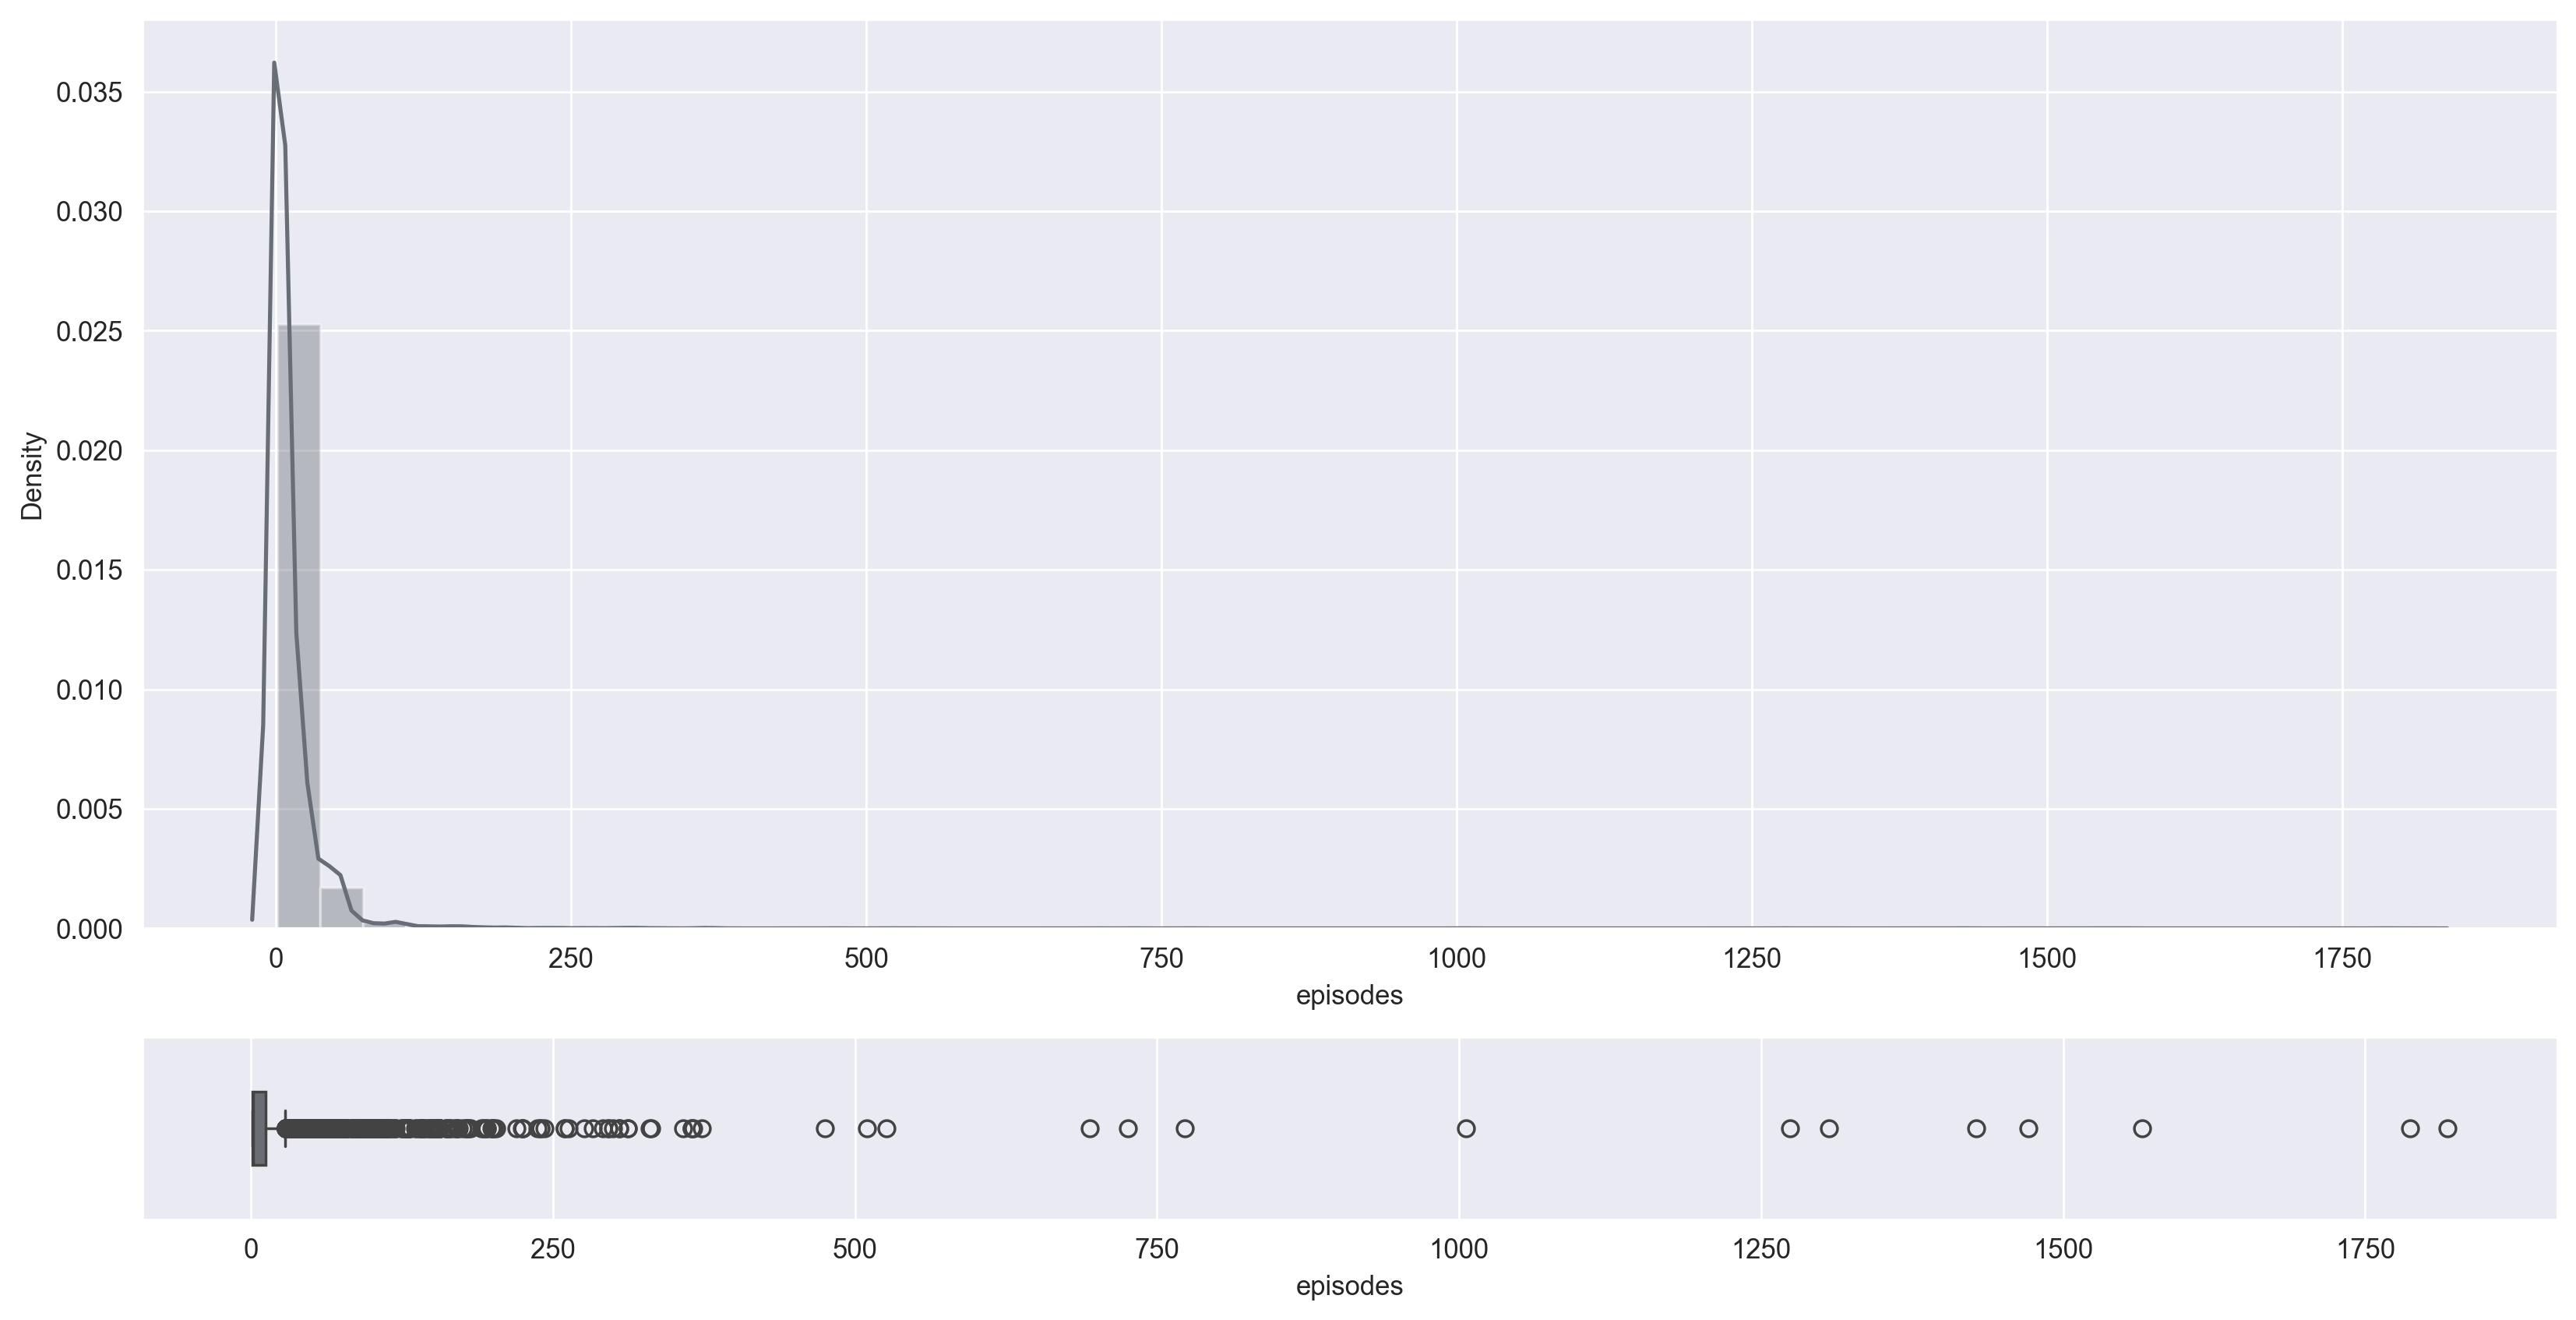

In [ ]:
gridkw = dict(height_ratios=[5, 1])
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw=gridkw)

sns.distplot(anime_data['episodes'], ax=ax1 , color='#686D76') #array, top subplot
sns.boxplot(x=anime_data['episodes'], ax=ax2, width=.4, color='#686D76') #bottom subplot

plt.show()

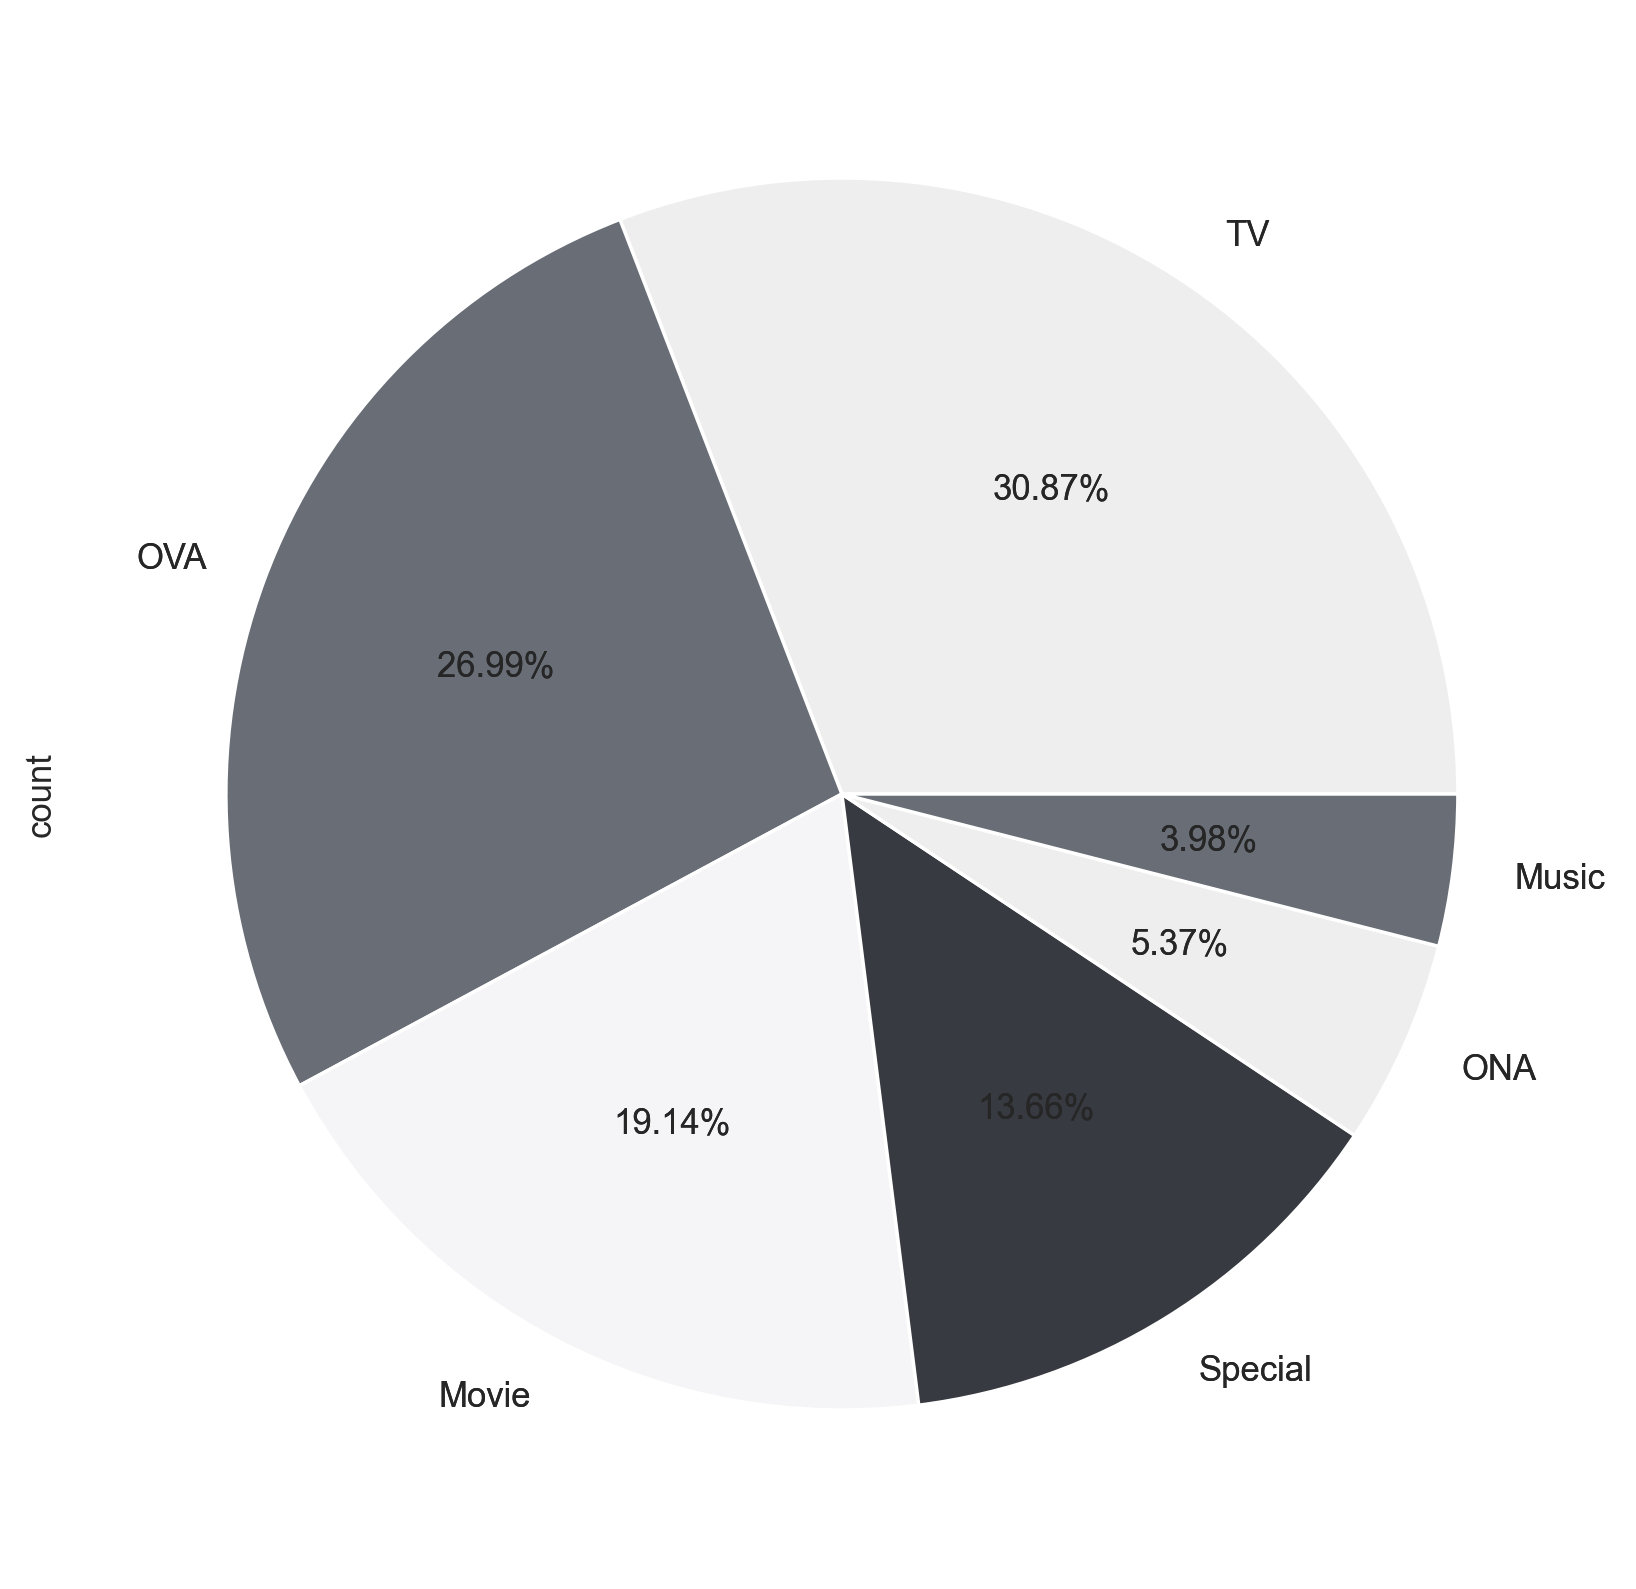

In [ ]:
anime_data['type'].value_counts().plot(kind='pie', autopct = '%.2f%%',
                                                colors=['#EEEEEE', '#686D76', '#F5F5F7', '#373A40'])

plt.show()

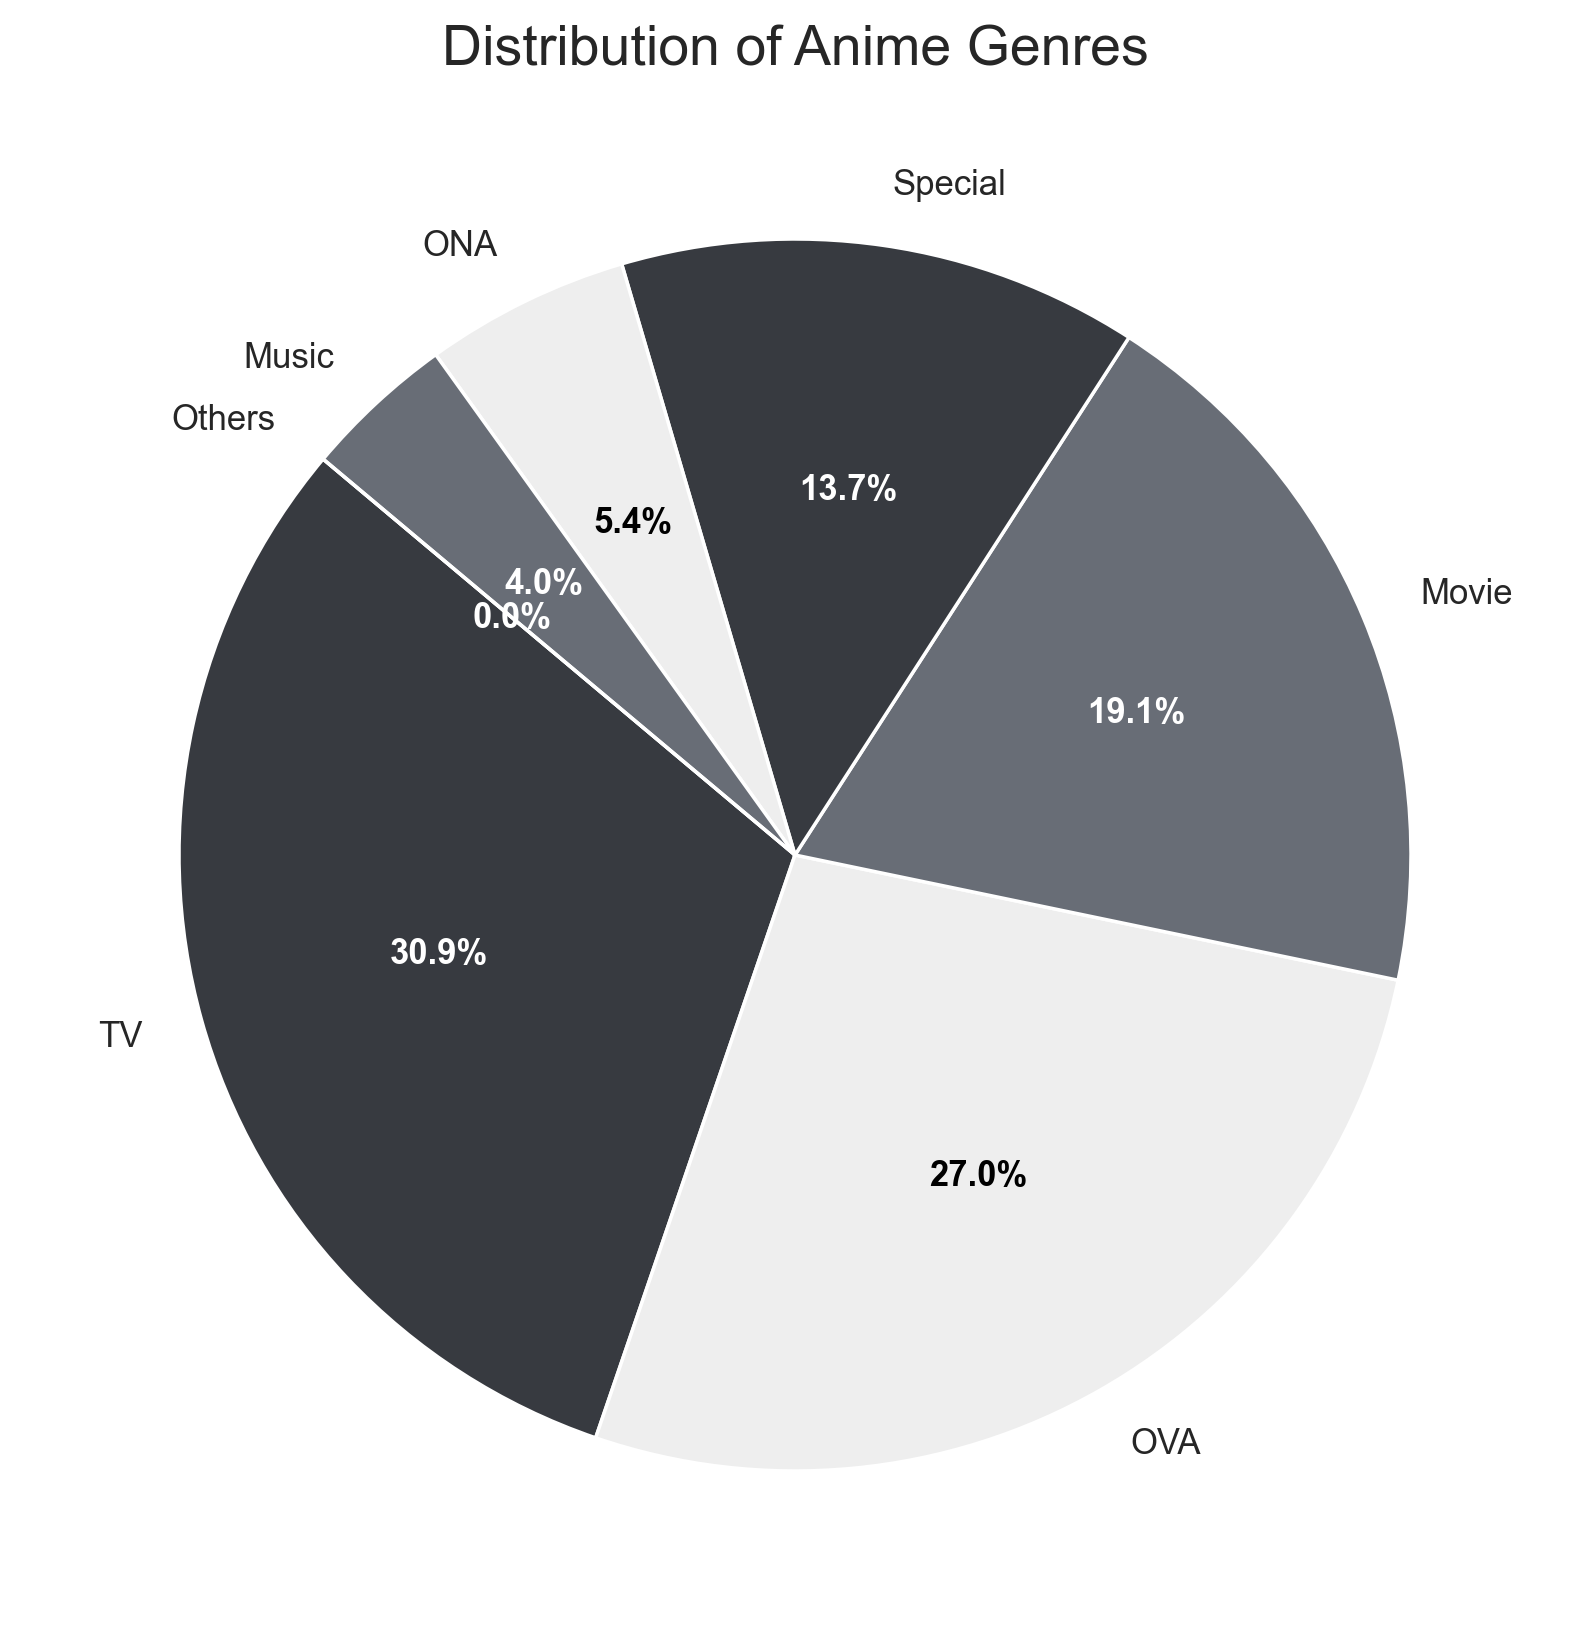

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming anime_dataset is a DataFrame with a 'genre' column
# Example dataset setup
# anime_dataset = pd.DataFrame({'genre': ['Action, Comedy', 'Drama, Romance', ...]})

# Splitting the genre column into individual genres and counting occurrences
genre_counts = anime_data['type'].str.split(', ').explode().value_counts()

# Aggregating genres: Displaying the top 10 and grouping the rest into "Others"
top_genres = genre_counts[:10]
others_count = genre_counts[10:].sum()
genre_counts_modified = pd.concat([top_genres, pd.Series(others_count, index=['Others'])])

# Creating the pie chart with the modified data
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#373A40', '#EEEEEE', '#686D76', '#373A40', '#EEEEEE', '#686D76', '#373A40', '#EEEEEE', '#686D76', '#373A40', '#F5F5F7']

# Plotting the pie chart
wedges, texts, autotexts = ax.pie(
    genre_counts_modified,
    labels=genre_counts_modified.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Adjust the color of the percentages dynamically
for autotext, wedge in zip(autotexts, wedges):
    color = wedge.get_facecolor()  # Get the wedge's face color
    # Calculate brightness (perceived luminance)
    brightness = 0.299 * color[0] + 0.587 * color[1] + 0.114 * color[2]
    # Change text to white if the background is dark
    autotext.set_color('white' if brightness < 0.5 else 'black')

# Customize text and title
plt.setp(autotexts, fontsize=10, weight='bold')
ax.set_title('Distribution of Anime Genres', fontsize=16)

plt.show()

- Anime :
    - top anime(members/rating)[0,0:1]
    - longest running anime(episode)[1,0]
    - most watched(members)[1,1]

- genre :
    - most watched genre
    - no of anime per genre
    - no of members per genre
    - top anime per genre

- type :
    - most watched type
    - no of anime per type
    - no of members per type
    - top anime per type

In [69]:
amr = anime_data.sort_values(by=['members', 'rating'], ascending=False).head(5)

amr

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796


In [81]:
anime_data[anime_data['episodes'] == 'Unknown'].episodes = "1"

In [82]:
anime_data['episodes'] = anime_data['episodes'].apply(pd.to_numeric)

anime_data['episodes'].dtype

ValueError: Unable to parse string "Unknown" at position 0

In [73]:
long = anime_data.sort_values(by='episodes', ascending=False).head(5)

long

,anime_id,name,genre,type,episodes,rating,members
8480,29605,Double Hard,"Action, Martial Arts",ONA,Unknown,6.53,177
10902,32937,Kono Subarashii Sekai ni Shukufuku wo! 2,"Adventure, Comedy, Fantasy, Magic, Supernatural",TV,Unknown,NaN,54069
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,NaN,8666
10917,33743,Fuuka,"Drama, Ecchi, Music, Romance, School, Shounen",TV,Unknown,NaN,9854
10915,33852,Mekakucity Reload,"Comedy, Romance, Sci-Fi, Super Power, Supernat...",TV,Unknown,NaN,14017


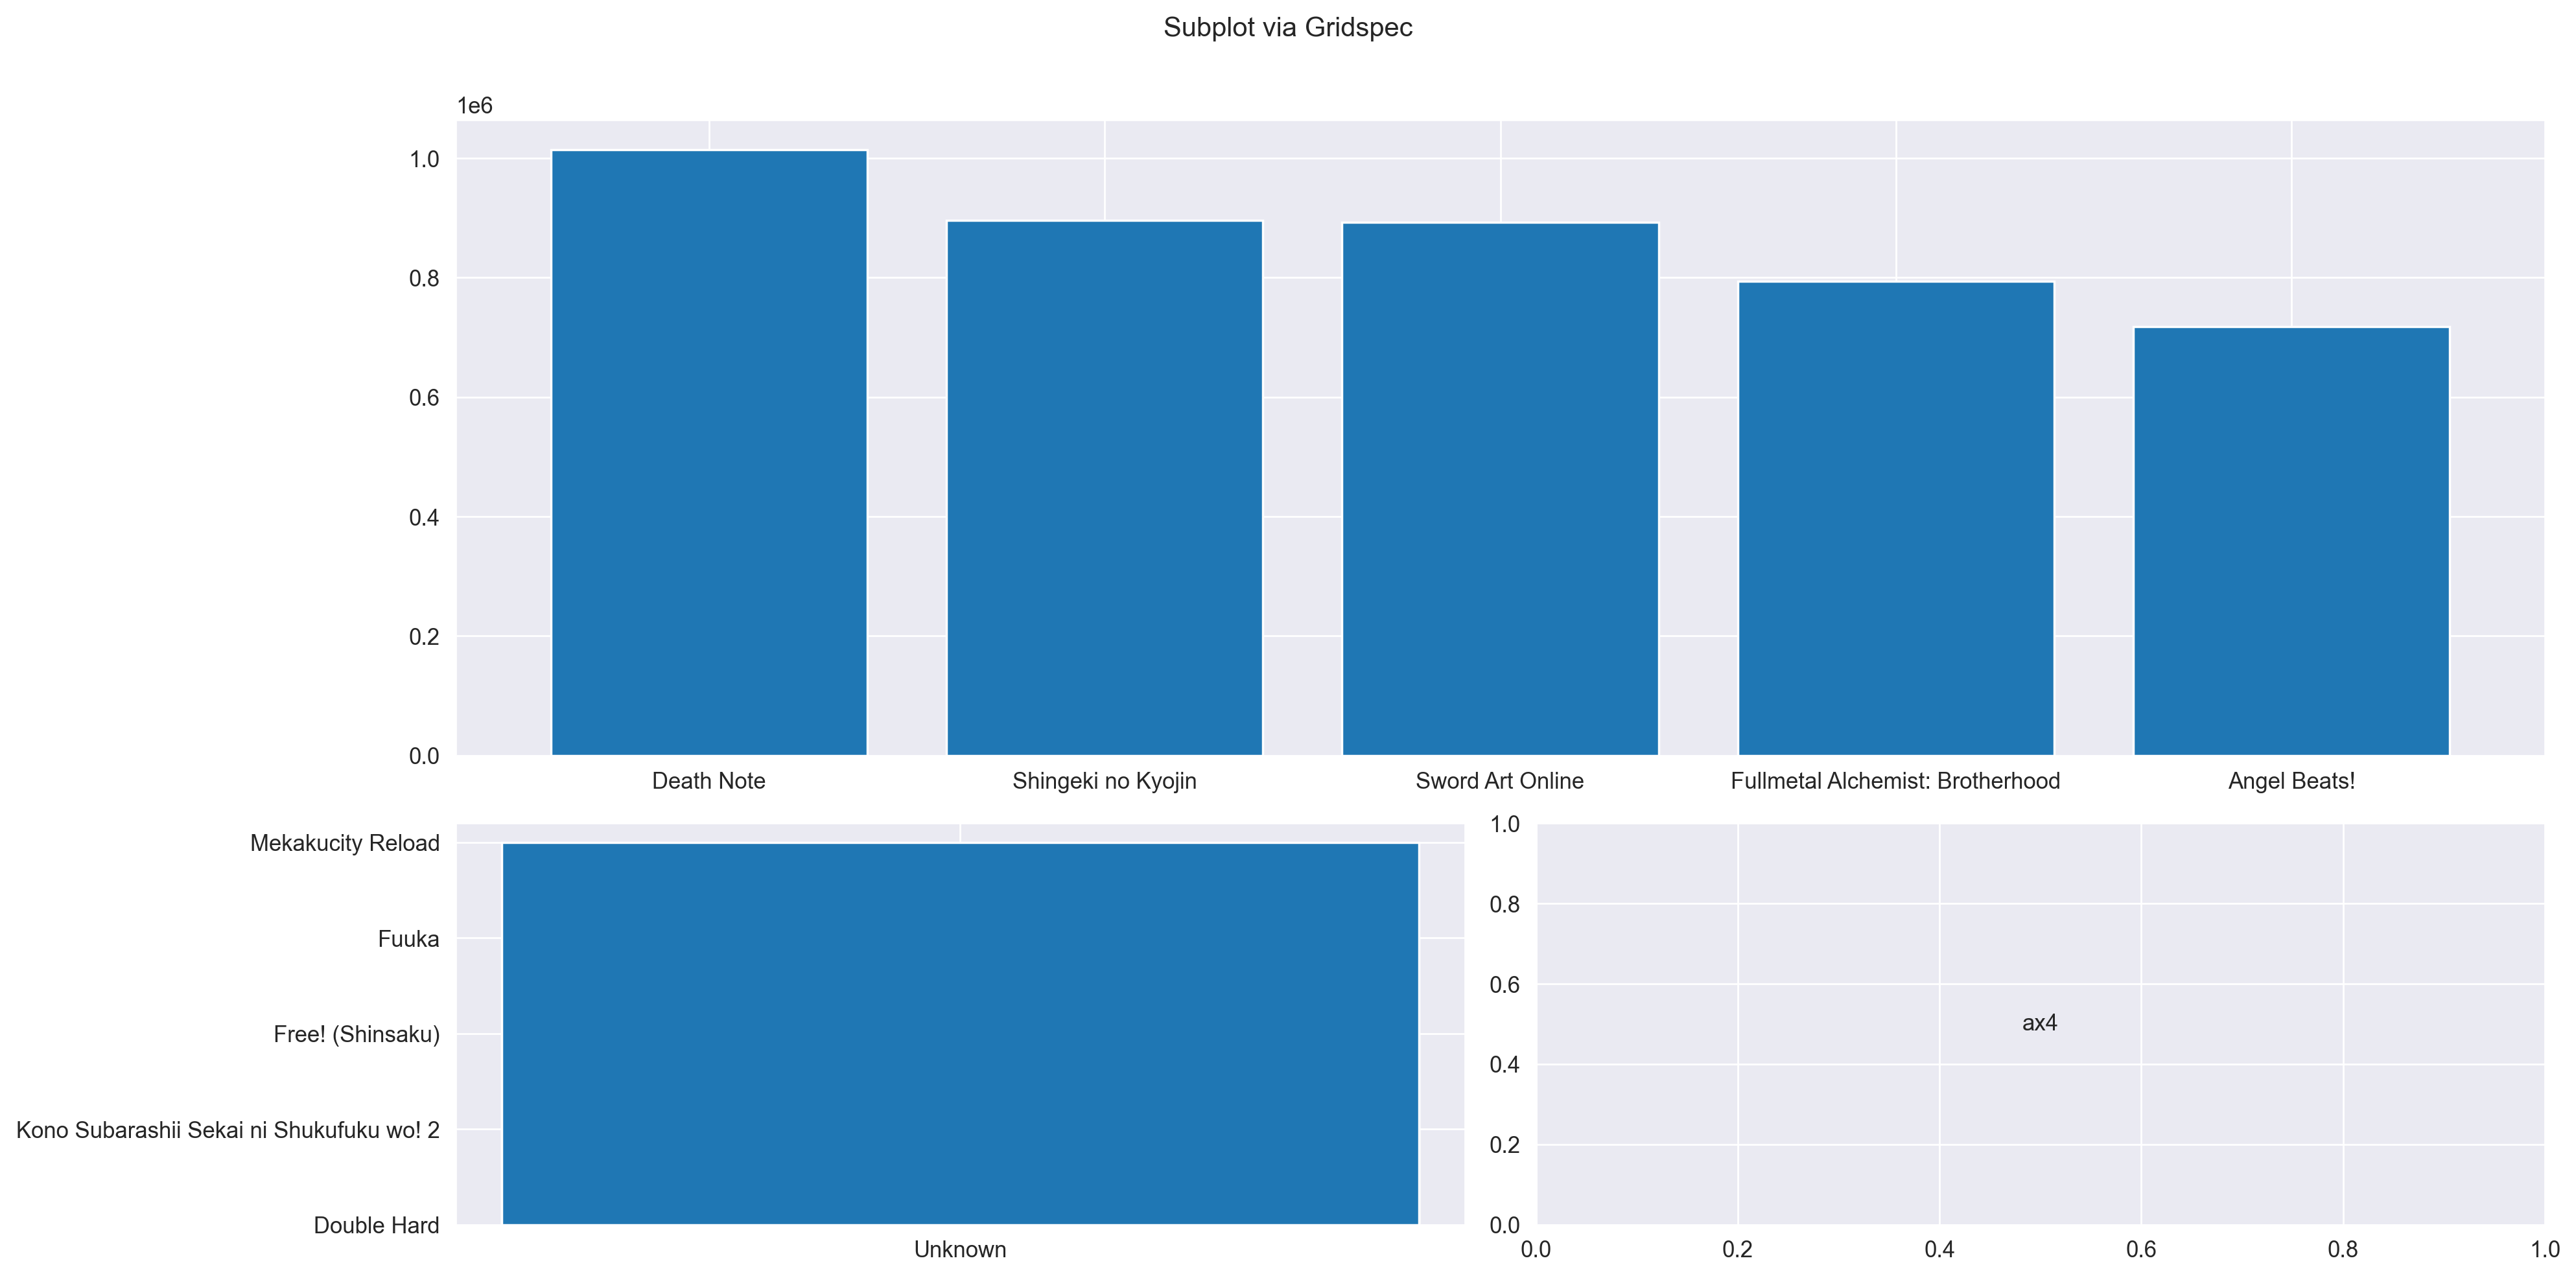

In [77]:
# Create the figure
fig1 = plt.figure(1)

# Create a gridspec object
gs1 = gs.GridSpec(nrows=5, ncols=8)

# Axis handle for plot 1
ax1 = plt.subplot(gs1[0:3, 0:])
ax1.bar(amr['name'],amr['members'])


# Axis handle for plot 3
ax3 = plt.subplot(gs1[3:5, 0:4])
ax3.bar(long['episodes'],long['name'])

# Axis handle for plot 4
ax4 = plt.subplot(gs1[3:5, 4:8])
ax4.text(x=0.5, y=0.5, s="ax4", va="center", ha="center")

plt.suptitle("Subplot via Gridspec")
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()